#  <font color='Blue' align='right'>1D Stefan Problem </font> 

## <font color='olive'> Introduction </font>

In general, due to temperature variance matter is subjected to phase chage. Therefore, a boundary is developed seperating the two phases of matter. This boundary act as an interface. The position of interface is determined as function of time. Stefan problem genrally used to determine the temperature distribution in phase change models.

In this problem, the vapor and liquid are taken in a free slip tube as shown in figure. <img src="./1d stefan problem.jpg"style="width: 300px,right;"/> Temprature of the wall $T_{wall}$ is set to constant which is greater than saturation temperature $T_{sat}$. $T_{sat}$ is the inital temperature of the liquid phase.
At time t=0, the vapour and liquid are constant. at time $t>0$, the liquid will boil at the interface,and due to heat flux and volume expansion the interface will move towards the tube outlet.

In [31]:
from matplotlib import pyplot, cm
from math import * 
import numpy
%matplotlib inline
from scipy.special import erf
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## <font color='olive'> Theoritical Solution </font>

The intrace postion and Temperature distribution is calculated from the theoritical formula.
$$X_I = 2 \chi \sqrt{\alpha_V*t} \quad \quad \quad \quad \quad (1)$$

$$T = T_{wall} + \frac{T_{wall}-T_{sat}}{erf(\chi)}erf (\frac{\chi}{2\sqrt{\alpha_V*t}}) \quad \quad  (2)$$

$\chi$ is calcuated from transcedental equation
$$\chi \exp{(\chi^2)} erf(\chi) = \frac{C_{pv} (T_{wall}-T_{sat})}{\sqrt{\pi L}}$$
$L$ = latent heat of the vaporization, $C_{pv}$=The specific heat capacity of the vapor,$\alpha_v$ = thermal diffusitivity of the vapour,

In [5]:
t = 0.1                           #time
alpha1 = 2.06*10**-5              #thermal diffusitivity of vapour
alpha2 = 0.17*10**-6              #thermal diffusitivity of water
Cp = 2030                         #The specific heat capacity of the vapor
Tw = 383.15                       #wall temperature
Tsat = 373.15                     #saturation temperature
L = 2.26*10**6                    #Latent Heat
chi = 0.0669161                   #value calculated from eqn 3


Initial parameters are set:

In [6]:
#initial conditions 
l = 0.001                         #Length of the Domain
nx = 100                          #number of points
dx = l/nx
dt = (dx**2*0.05)/(max(alpha1,alpha2))
nt = int(t/dt)                    #Time steps


In [7]:
#For calculating the interface position;
nt = int(t/dt)
for tstep in range(1,nt):
    XItheo = 2*chi*(sqrt(alpha1*tstep*dt))

In [8]:
x = numpy.linspace(0,0.001,nx)

Ttheo = Tw  + ((Tsat-Tw)/erf(chi))*erf(x/(2*sqrt(alpha1*t)))

for i in range (0,nx):
    if Ttheo[i]<Tsat:
        Ttheo[i]=Tsat

## <font color='olive'> Numerical Solution </font>

The numerical solution for 1D Stefan is calculated by discretizing the goverining equation $$\frac{\partial T}{\partial t} = \frac{\partial }{\partial x}( \alpha\frac{\partial T}{\partial x}) \quad \quad \quad  (3)$$;

The heat equation is modified  in this problem to avoid the jumps in temperature distribution as shown in fig 1.

In the first step we find the position of the interface using the $eqn (1)$. from the interface postion we calculate the distance to the grid point, Disatance$(\phi_i)$. The governing equation's discretization in the following manner; 

$Case 1$
<img src="./p11.jpg"style="width: 300px,;"/>
fig shows the stencil when everything is present in the vapor phase. Then the discretization for the diffusivity is as follows:

$$\frac{\partial}{\partial x}(\alpha \frac{\partial T}{\partial x}) = \frac{\alpha_1 (\frac{T_{i+1}-T_i}{dx})-\alpha_1 (\frac{T_i-T_{i-1}}{dx})}{dx} $$

The final Discretized equation is:
$$T[i] = T[old_i] + dt \frac{\alpha_1 (\frac{T_{i+1}-T_i}{dx})-\alpha_1 (\frac{T_i-T_{i-1}}{dx})}{dx} \quad \quad \quad \quad  (4)$$

$Case 2$

when everything is present in the liquid phase. Then the discretization for the diffusivity is as follows:

$$\frac{\partial}{\partial x}(\alpha \frac{\partial T}{\partial x}) = \frac{\alpha_2 (\frac{T_{i+1}-T_i}{dx})-\alpha_2 (\frac{T_i-T_{i-1}}{dx})}{dx} $$

$$T[i] = T[old_i] + dt \frac{\alpha_2 (\frac{T_{i+1}-T_i}{dx})-\alpha_2 (\frac{T_i-T_{i-1}}{dx})}{dx} \quad \quad \quad \quad \quad (5) $$
$Case 3$

When the interface is in between $(\phi_i)$ and $(\phi_{i+1})$

if $(\phi_i)*(\phi_{i+1}) \leq 0$
the stencil looks as follows <img src="./Phase 3.jpg"style="width: 300px,;"/>
In typical multiphase problems, There will be a jump in temperature and insatbility occurs.
Hence, all the thermal properties are diffused at the interface to get the stability.
Therefore the equation is discretized as follow,
$$\frac{\partial}{\partial x} (\alpha_{(i+I)/2} \frac{\partial T}{\partial x}) \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad(6)$$

let $$abs(\phi_i)+(abs(\phi_{i+1}) = dx$$

for convinience; we consider the ratio of distance from interface to the ratio the disatance between grid points as "$\theta$"
therefore $$\theta = \frac{abs(\phi_i)}{abs(\phi_i)+(abs(\phi_{i+1})} \quad \quad \quad \quad \quad \quad \quad \quad(7)$$

discretizing the diffusivity term at $i+1$
$$\frac{\partial T}{\partial x} = \frac{T_{sat}-T_i}{abs(\phi_i)} \quad \quad \quad \quad  \quad \quad \quad \quad \quad \quad \quad \quad \quad(8)$$

discretizing the alpha:
$$\alpha_{(i+I)/2} = (\alpha_i + \alpha I)/2 \quad \quad \quad \quad \quad \quad \quad \quad\quad \quad \quad \quad \quad \quad(9)$$ 
$\alpha I = \alpha$ at interface $\quad$ $\alpha_i = \alpha$ at the point $i$ 

$$\alpha_I = \frac{abs(\phi_i)(\alpha_i)+(abs(\phi_{i+1}) \alpha_{i+1}}{abs(\phi_i)+(abs(\phi_{i+1})} \quad \quad \quad \quad \quad \quad \quad \quad (10)$$

seperating the numerators and solving we get:
$$\alpha_I = \frac{abs(\phi_i)(\alpha_i)}{abs(\phi_i)+(abs(\phi_{i+1})} + \frac{abs(\phi_{i+1}) \alpha_{i+1}}{abs(\phi_i)+(abs(\phi_{i+1})}$$

substituting the values from  $eqn (7)$ and solving it we get:
$$\alpha_I = \alpha_i \theta + \alpha_{i+1}(1-\theta) \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad(11)$$

substituting the $\alpha_I$ in $equation (8)$
$$\alpha_{(i+I)/2} = \frac{\alpha_i + \alpha_i \theta + \alpha_{i+1}(1-\theta)}{2} \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad (12)$$
$\alpha_{i+1}$ is in second phase, which is liquid. so we use $\alpha2$ value of liquid
and $\alpha_{i}$ is in vapor phase. Therefore, $\alpha 1$ value of vapour is substituted

substituting $eqn(8)$ and $eqn(12)$ these values $eqn(6)$ we get the final discretized eqn as
we get$$\frac{\partial}{\partial x}(\alpha \frac{\partial T}{\partial x}) = \frac{\frac{\alpha_1 \theta + \alpha_2 (1-\theta) + \alpha_1}{2} (\frac{T_{sat}-T_i}{\theta dx})-\alpha_1 (\frac{T_i-T_{i-1}}{dx})}{dx} \quad \quad \quad \quad \quad \quad \quad \quad (13)$$

The discretized form of eqn 3:
$$T[i] = T[old_i] + dt (\frac{\frac{\alpha_1 \theta + \alpha_2 (1-\theta) + \alpha_1}{2} (\frac{T_{sat}-T_i}{\theta dx})-\alpha_1 (\frac{T_i-T_{i-1}}{dx})}{dx}) \quad \quad \quad \quad \quad (14) $$

$case 4:$
When the interface is in between $(\phi_i)$ and $(\phi_{i-1})$

if $(\phi_i)*(\phi_{i-1}) \leq 0$

fig describes the stencil <img src="./phase 4.jpg"style="width: 300px,;"/> 

following the similar procedure as like 
we get the final discretized equation given by:
$$T[i] = T[old_i] + dt  (\frac{\alpha_2 \frac{T_{i+1}-Ti}{dx} -\frac{(\alpha_2 \theta + \alpha_1(1-\theta) + \alpha_2)}{2} \frac{T_i-T_{sat}}{\theta dx}}{dx})$$

Dirichlet boundary conditions are set according to reference [1]
one end wall it is set to Temperature of the wall
and other is set to saturation temperature.

Let's use the same initial parameters used for Theoretical solution

In [9]:
#Solving transcedental equation to find out the interface distance

phi = numpy.zeros((nx,1),dtype=float)
T = numpy.zeros((nx,1),dtype=float) 
T[:] = Tsat 

tol = 0.1

for tstep in range(1,nt):
    XI = 2*chi*(sqrt(alpha1*tstep*dt)) #Calculated the interface position
    
    #Distance between the interface and the point
    for i in range(0,nx):
        phi[i] = XI - (i*dx) 
    
    Told = T.copy()
    
    #Temperature distribution at every point is calculated
    for i in range(1,nx-1):
        
        if(phi[i]*phi[i+1] <= 0.):
        
            if((abs(phi[i])/(abs(phi[i])+abs(phi[i+1])))>tol):
            
                th = (abs(phi[i])/(abs(phi[i])+abs(phi[i+1])))
                Txp = (Tsat-Told[i])/th + Told[i]
                axm = alpha1
                axp = (alpha1+(alpha1*th+alpha2*(1.-th)))*0.5
                Txm = Told[i-1]
            
            else:
            
                th = (abs(phi[i-1])/(abs(phi[i-1])+abs(phi[i+1])))
                Txp = (Tsat-Told[i-1])/th + Told[i]
                axm = alpha1
                axp = (alpha1+(alpha1*th+alpha2*(1.-th)))*0.5
                Txm = Told[i-1]
            
    
        elif(phi[i]*phi[i-1] <= 0.):
        
            if((abs(phi[i])/(abs(phi[i])+abs(phi[i-1])))>tol):
            
                th = (abs(phi[i])/(abs(phi[i])+abs(phi[i-1])))
                Txm = (Told[i]-Tsat)/th + Told[i]
                axp = alpha2
                axm = (alpha2+(alpha2*th+alpha1*(1.-th)))*0.5
                Txp = Told[i+1]
            
            else:
            
                th = (abs(phi[i+1])/(abs(phi[i+1])+abs(phi[i-1])))
                Txm = (Told[i+1]-Tsat)/th + Told[i]
                axp = alpha2
                axm = (alpha2+(alpha2*th+alpha1*(1.-th)))*0.5
                Txp = Told[i+1]
    
        else:
            
            Txm = Told[i-1]
            Txp = Told[i+1]
            
            if(phi[i]>=0.):
                axm = alpha1
                axp = alpha1
            
            else:
                axm = alpha2
                axp = alpha2
                
        
        T[i] = Told[i] + dt*(axp*(Txp-Told[i])/dx - axm*(Told[i]-Txm)/dx)/dx          
            
            
    #Boundary Conditions
    T[0] = Tw
    T[-1] = Tsat
    
    T_res = sum((T-Told)**2)/nx       

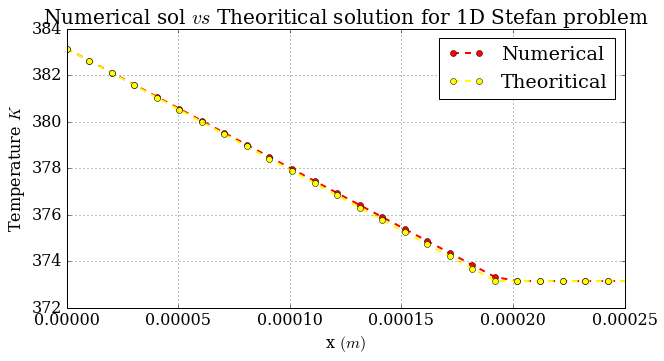

In [30]:
pyplot.figure(figsize=(10,5))
pyplot.grid(True)
pyplot.plot(numpy.linspace(0,l,nx),T,'red',ls ='--',linewidth='2', marker ='o',label='Numerical')
pyplot.plot (x,Ttheo, 'Yellow',ls ='--',linewidth='2', marker ='o',label='Theoritical')
pyplot.xlim(0,0.00025)
pyplot.xlabel('x $(m)$', fontsize=16)
pyplot.ylabel('Temperature $K$', fontsize=16)
pyplot.legend(loc='upper right')
pyplot.title('Numerical sol $vs$ Theoritical solution for 1D Stefan problem',fontsize=20)

# <font color='olive'> Conclusion </font>

From the plot it is observed that there is sudden jump in Temperature. although, there is accuracy using this method but there is no stability. Therefore To achieve the stability, the numerical method was developed as mentioned in reference[2].
This scheme aims to achieve the stability while solving the multi phase problems.

## <font color='olive'> References </font>

[1] Sato, Yohei, and Bojan NiÄeno. "A Sharp-interface Phase Change Model for a Mass-conservative Interface Tracking Method." Journal of Computational $\quad$ Physics 249 (2013): 127-61. Web.

[2] Son, Gihun, and Vijay K. Dhir. "A Level Set Method for Analysis of Film Boiling on an Immersed Solid Surface." Numerical Heat Transfer, Part B: $\quad$Fundamentals 52.2 (2007): 153-77. Web.